In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# data collection

In [2]:
#import train and test data.
train=pd.read_csv('train_bigmart.csv')
test=pd.read_csv('test_bigmart.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.Outlet_Size .describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
Item_Identifier=test['Item_Identifier']
Outlet_Identifier=test['Outlet_Identifier']


In [6]:
train.drop('Item_Identifier',axis=1,inplace=True)
test.drop('Item_Identifier',axis=1,inplace=True)

In [7]:
train.drop('Outlet_Identifier',axis=1,inplace=True)
test.drop('Outlet_Identifier',axis=1,inplace=True)

## Handling Missing Values

In [8]:
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
test.Item_Weight = test.Item_Weight.fillna(train.Item_Weight.mean())

In [11]:
mode_of_Outlet_size1 =test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size2 =train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [12]:
print(mode_of_Outlet_size1)
print(mode_of_Outlet_size2)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values1 = train['Outlet_Size'].isnull()
miss_values2 = test['Outlet_Size'].isnull()

In [14]:
train.loc[miss_values1, 'Outlet_Size'] = train.loc[miss_values1,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size1[x])
test.loc[miss_values2, 'Outlet_Size'] = test.loc[miss_values2,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size2[x])

In [15]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [16]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
train['Item_Weight'].mean()

12.857645184135976

In [18]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [19]:
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

# Data Analysis

## remove outliers

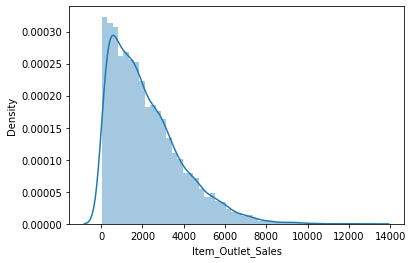

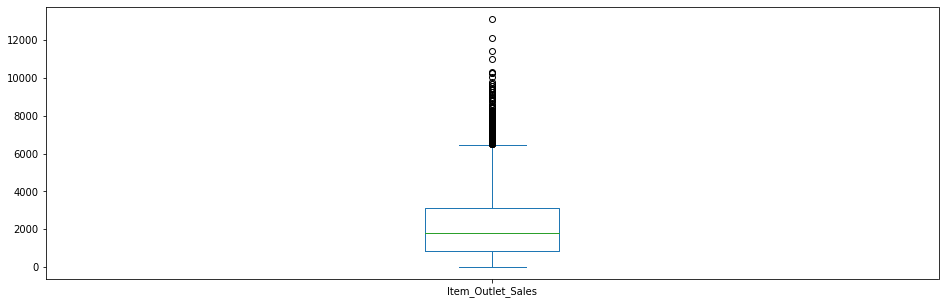

In [20]:

sns.distplot(train['Item_Outlet_Sales']);
plt.show()
train['Item_Outlet_Sales'].plot.box(figsize= (16,5))
plt.show()

In [21]:
def remoutl(row):
    percentile25 = train[row].quantile(0.25)
    percentile75 = train[row].quantile(0.75)
    print(percentile25,percentile75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    train[row] = np.where(
    train[row] > upper_limit,
    upper_limit,
    np.where(
        train[row] < lower_limit,
        lower_limit,
        train[row]
           )
             )
    
    test[row] = np.where(
    test[row] > upper_limit,
    upper_limit,
    np.where(
        test[row] < lower_limit,
        lower_limit,
        test[row]
           )
             )
    

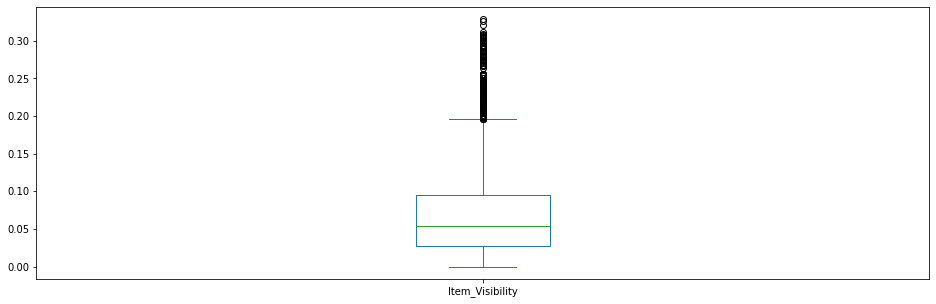

In [22]:
train['Item_Visibility'].plot.box(figsize= (16,5))
plt.show()

In [23]:
remoutl('Item_Visibility')

0.0269894775 0.0945852925


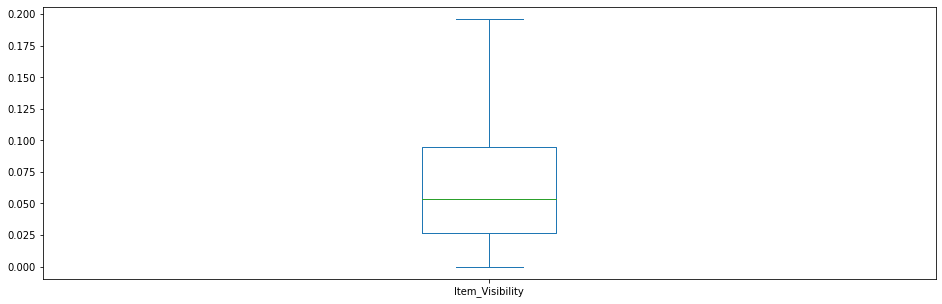

In [24]:
train['Item_Visibility'].plot.box(figsize= (16,5))
plt.show()

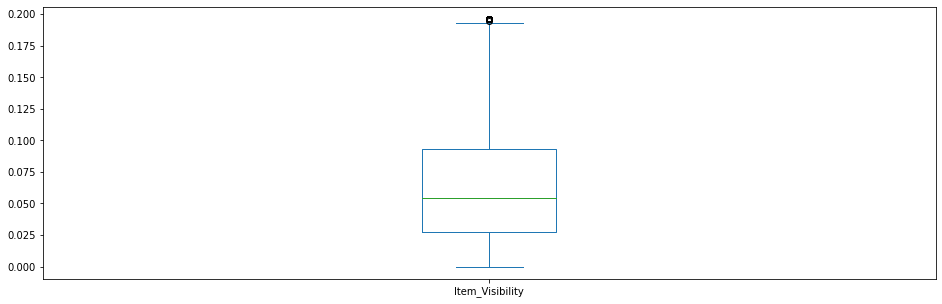

In [25]:
test['Item_Visibility'].plot.box(figsize= (16,5))
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

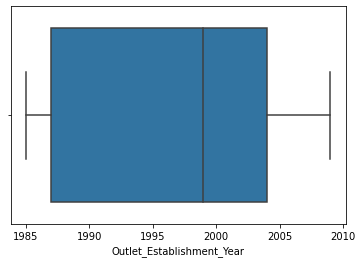

In [26]:
sns.boxplot(train['Outlet_Establishment_Year'])

## remove skewness

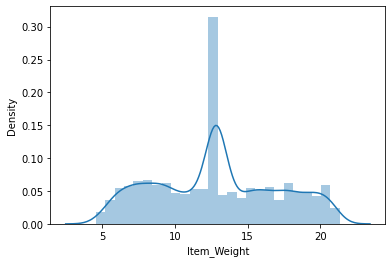

In [27]:
sns.distplot(train['Item_Weight']);
plt.show()

In [28]:
train['Item_Weight'].skew()

0.09056145191767477

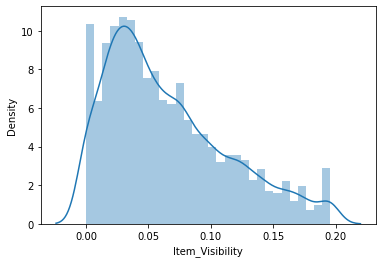

In [29]:
sns.distplot(train['Item_Visibility']);
plt.show()

In [30]:
train['Item_Visibility'].skew()

0.813979627580485

In [31]:
train['Item_Visibility']=(train['Item_Visibility'])**.5
test['Item_Visibility']=(test['Item_Visibility'])**.5

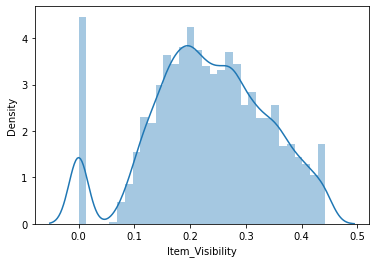

In [32]:
sns.distplot(train['Item_Visibility']);
plt.show()

## ENCODING

In [33]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [34]:
train['Item_Fat_Content']= label_encoder.fit_transform(train['Item_Fat_Content'])
test['Item_Fat_Content']= label_encoder.fit_transform(test['Item_Fat_Content'])

In [35]:
train['Item_Type']= label_encoder.fit_transform(train['Item_Type'])
test['Item_Type']= label_encoder.fit_transform(test['Item_Type'])

In [36]:
train['Outlet_Size']= label_encoder.fit_transform(train['Outlet_Size'])
test['Outlet_Size']= label_encoder.fit_transform(test['Outlet_Size'])

In [37]:
train['Outlet_Location_Type']= label_encoder.fit_transform(train['Outlet_Location_Type'])
test['Outlet_Location_Type']= label_encoder.fit_transform(test['Outlet_Location_Type'])

In [38]:
train['Outlet_Type']= label_encoder.fit_transform(train['Outlet_Type'])
test['Outlet_Type']= label_encoder.fit_transform(test['Outlet_Type'])

In [39]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.126678,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.138846,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.129461,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [40]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.086976,13,107.8622,1999,1,0,1
1,8.300000,1,0.196030,4,87.3198,2007,2,1,1
2,14.600000,0,0.315555,11,241.7538,1998,2,2,0
3,7.315000,0,0.124050,13,155.0340,2007,2,1,1
4,12.857645,1,0.344383,4,234.2300,1985,1,2,3


# MODEL TRAINING

In [41]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

### XGBOOST

In [43]:
from xgboost import XGBRegressor
from sklearn import metrics

In [44]:
regressor = XGBRegressor()

In [45]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
training_data_prediction = regressor.predict(x_cv)

In [47]:
r2_train = metrics.r2_score(y_cv, training_data_prediction)

In [48]:
print('R Squared value = ', r2_train)

R Squared value =  0.5288076261242178


### LINEAR REGRESSION MODEL

In [49]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = regressor1.predict(x_cv)

In [51]:
r2_train2 = metrics.r2_score(y_cv, y_pred)

In [52]:
print('R Squared value = ', r2_train2)

R Squared value =  0.4948091155582707


### decision tree regressor

In [61]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [62]:
# Predicting the test set results
y_pred3 = regressor3.predict(x_cv)
y_pred3

array([3069.0273892 , 1459.73460539, 1173.68376346, ..., 2422.60292692,
       1990.6073847 , 2840.78571049])

In [63]:
r2_train3 = metrics.r2_score(y_cv, y_pred3)

In [64]:
print('R Squared value = ', r2_train3)

R Squared value =  0.5672188600225186


### Random Forest Regressor

In [65]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor4.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [66]:
# Predicting the test set results
y_pred4 = regressor4.predict(x_cv)

In [67]:
r2_train4 = metrics.r2_score(y_cv, y_pred4)

In [69]:
print('R Squared value = ', r2_train4)

R Squared value =  0.601408215871216


In [72]:
test_data_prediction3 = regressor3.predict(test)

In [73]:
test_data_prediction4 = regressor4.predict(test)

In [74]:
submission = pd.read_csv("sample_submission_sales prediction.csv")

In [76]:
submission["Item_Outlet_Sales"] =test_data_prediction4

In [77]:
pd.DataFrame(submission, columns= ["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]).to_csv('submission_sales prediction4.csv')